In [13]:
import os
import numpy as np
import sys
import h5py
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath('../heart_rhythm_analysis'))    # make repo root importable

In [29]:
def load_as_df(file_path,filename):
    bPlot = True
    h5_path = f"{file_path}/{filename}.h5"
    hf = h5py.File(h5_path, "r")
    
    rows = []
    for subj in hf.keys():
        subj_grp = hf[subj]
        for win_id in subj_grp.keys():
            win_grp = subj_grp[win_id]
            rec_id = win_grp.attrs['rec_id']
            label = win_grp.attrs['label']
            raw_len  = win_grp["raw_ppg"].shape[0]
            proc_len = win_grp["proc_ppg"].shape[0]
            fs       = win_grp.attrs["fs"]
            rows.append({
                "subject": subj,
                "window_id": win_id,
                "rec_id": rec_id,
                "label": label,
                "fs_out": fs,
                "raw_len": raw_len,
                "proc_len": proc_len,
                "duration_raw_s": raw_len / fs,
                "duration_proc_s": proc_len / fs
            })

    # 3) Build a DataFrame for easy viewing
    df = pd.DataFrame(rows)
    print(f"\nTotal windows: {len(df)}")
    if bPlot:
        # 4) Example: plot the very first processed window
        print(np.random.random_integers(0,len(df)))
        first = df.iloc[np.random.random_integers(0,len(df))]
        win_grp = hf[first.subject][first.window_id]
        y = win_grp["proc_ppg"][:]   # numpy array
        t = np.arange(len(y)) / first.fs_out

        plt.figure(figsize=(8,3))
        plt.plot(t, y)
        plt.title(f"Subject {first.subject} – Window {first.window_id}\nfs={first.fs_out} Hz")
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.tight_layout()
        plt.show()
        
    hf.close()
    return df

# Create Capno Dataset

Saved windows HDF5 to ../data/processed/length_full/capnobase_db/capnobase_db.h5

Total windows: 672


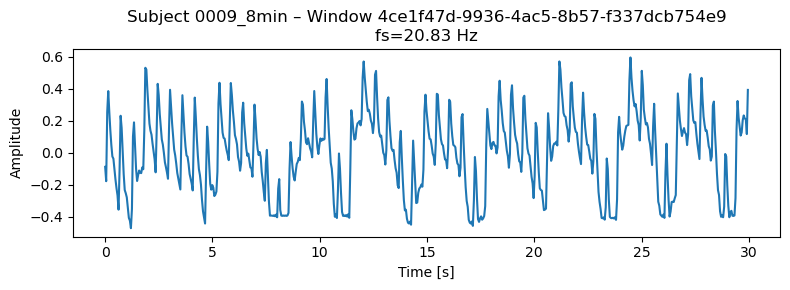

,subject,window_id,rec_id,label,fs_out,raw_len,proc_len,duration_raw_s,duration_proc_s
0,0009_8min,036e9cf1-3b0c-4725-b3a4-eb9b0a381619,0,-1,20.83,9000,625,432.069131,30.004801
1,0009_8min,07b78183-4441-46b8-93c6-5ed71cccf9c7,0,-1,20.83,9000,625,432.069131,30.004801
2,0009_8min,1315e7c6-9e17-4f3c-b982-1aa0caa7fa7c,0,-1,20.83,9000,625,432.069131,30.004801
3,0009_8min,34375300-c510-4d22-b8e9-75fd5faeefaa,0,-1,20.83,9000,625,432.069131,30.004801
4,0009_8min,3dcd3695-2288-425b-b818-71893078eff0,0,-1,20.83,9000,625,432.069131,30.004801
5,0009_8min,4ce1f47d-9936-4ac5-8b57-f337dcb754e9,0,-1,20.83,9000,625,432.069131,30.004801
6,0009_8min,5044c071-97a7-4b2f-b829-ace6eaba3256,0,-1,20.83,9000,625,432.069131,30.004801
7,0009_8min,5e034fee-8351-4054-9459-7113722cf9fb,0,-1,20.83,9000,625,432.069131,30.004801
8,0009_8min,61453623-75ee-4a77-9833-f6295cab10bc,0,-1,20.83,9000,625,432.069131,30.004801
9,0009_8min,79a67a0c-4216-4559-899f-26d4f2f0e645,0,-1,20.83,9000,625,432.069131,30.004801


In [15]:
# %autoreload 2

from heart_rhythm_analysis.get_data.CapnoBaseETL import CapnoBaseETL

def main():
    root_path = os.path.join('../data/raw/capnobase/data/mat')
    out_path = os.path.join('../data/processed/length_full/capnobase_db')
    out_filename = 'capnobase_db'
    if not os.path.exists(out_path):
        os.mkdir(out_path)

    fs_in = 100.00
    fs_out = 20.83

    config = {
    "input_dir"      : root_path,
    "output_dir"     : out_path,
    "window_size_sec": 30,
    "fs_in"          : fs_in,
    "fs_out"   : fs_out,
    "lowpass_cutoff" : (fs_out / 2),
    "fir_numtaps"    : 129,
    "zero_phase"     : True,
    "out_filename" :  out_filename
}
    cfg = {'input_dir': root_path, 'output_dir': out_path}
    etl = CapnoBaseETL(config)
    h5file = etl.process_all()
    print(f"Saved windows HDF5 to {h5file}")
    df = load_as_df(out_path,out_filename)

    display(df.head(10))
    return df
if __name__ == "__main__":
    df_capnobase = main()

# MIMIC III AF DATASET

Loading ../data/raw/mimic_af_nonaf/mimic_af_data.mat
Saved AF windows to ../data/processed/length_full/mimic_af_db/mimic_af_db.h5

Total windows: 7212


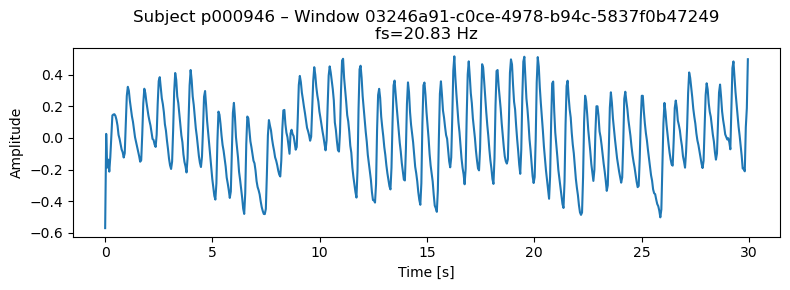

,subject,window_id,rec_id,label,fs_out,raw_len,proc_len,duration_raw_s,duration_proc_s
0,p000946,016b4034-5719-41b7-bd31-84ea941547b3,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801
1,p000946,01e8b1b2-fad0-4d9e-befe-7895f905affc,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801
2,p000946,024dffed-ad6c-4d7f-a31a-7287513f00d6,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801
3,p000946,02537528-41b9-4ee0-8f31-2ac845f4c54d,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801
4,p000946,02e1d74e-3d59-4df3-b0b1-d0eb87819880,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801
5,p000946,03246a91-c0ce-4978-b94c-5837f0b47249,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801
6,p000946,0378899e-5da7-4d0c-88ac-da01ad692c1d,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801
7,p000946,038339d4-90b0-442f-a729-c2acee23db38,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801
8,p000946,04bde61e-534d-4285-8655-0307d8773e86,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801
9,p000946,0642c89f-9064-494b-8d1a-a5e425a09915,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801


In [25]:
from heart_rhythm_analysis.get_data.MimicAFETL import MimicAFETL

def main():
    root_path = os.path.join('../data/raw/mimic_af_nonaf/mimic_af_data.mat')
    out_filename = 'mimic_af_db'
    out_path = os.path.join('../data/processed/length_full/mimic_af_db')
    
    if not os.path.exists(out_path):
        os.mkdir(out_path)
    config = {
        "input_dir": root_path,
        "output_dir":  out_path,
        "fs_in": 125.00,
        "fs_out": 20.83,
        "window_size_sec": 30,
        "scale_type": "norm",
        "zero_phase": True,
        "out_filename": out_filename
    }
    
    etl = MimicAFETL(config)
    out_file = etl.process()
    print("Saved AF windows to", out_file)
    df = load_as_df(out_path,out_filename)
    display(df.head(10))
    return df

if __name__ == "__main__":
    df_mimc_af = main()
    

# MIMIC III Non-AF Dataset

Loading ../data/raw/mimic_af_nonaf/mimic_non_af_data.mat
Saved non AF windows to ../data/processed/length_full/mimic_non_af_db/mimic_non_af_db.h5

Total windows: 9412


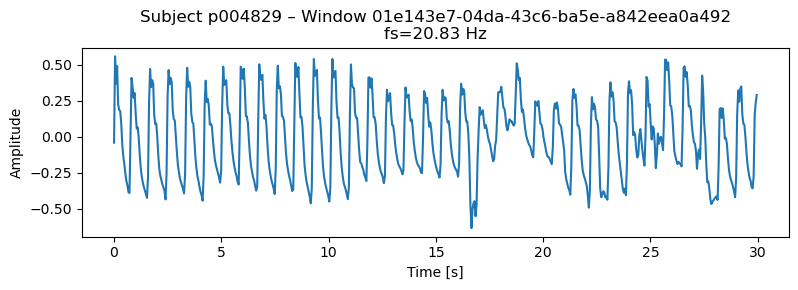

,subject,window_id,rec_id,label,fs_out,raw_len,proc_len,duration_raw_s,duration_proc_s
0,p004829,00079de6-cc02-4215-8990-7539235bbace,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
1,p004829,0024c285-5fee-423b-b5c8-2bdcad4f3790,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
2,p004829,003fb2d5-7795-461a-bfd5-265c8456a29d,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
3,p004829,01133b08-0cec-486f-817a-ef6f95a9bd51,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
4,p004829,019ddded-2a7e-4972-bd83-18659cdf0784,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
5,p004829,01e143e7-04da-43c6-ba5e-a842eea0a492,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
6,p004829,0246efd2-119a-46f2-b112-0732be6dbb36,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
7,p004829,02d7c0fa-513b-4c12-b6b7-ca8d1257d2d3,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
8,p004829,032f863b-00e5-4291-99d9-cf3965bb9605,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
9,p004829,034ad933-1ae7-40c2-9ab9-f71d526df2d6,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801


In [20]:
def main():
    root_path = os.path.join('../data/raw/mimic_af_nonaf/mimic_non_af_data.mat')
    out_filename = 'mimic_non_af_db'
    out_path = os.path.join('../data/processed/length_full/mimic_non_af_db')
    
    if not os.path.exists(out_path):
        os.mkdir(out_path)
    config = {
        "input_dir": root_path,
        "output_dir":  out_path,
        "fs_in": 125.00,
        "fs_out": 20.83,
        "window_size_sec": 30,
        "scale_type": "norm",
        "zero_phase": True,
        "out_filename": out_filename   
    }

    etl = MimicAFETL(config)
    out_file = etl.process()
    print("Saved non AF windows to", out_file)
    df = load_as_df(out_path,out_filename)
    display(df.head(10))
    return df
if __name__ == "__main__":
    df_mimc_nonaf = main()

# MIMIC III Ethnicity Subset

Loading ../data/raw/mimic_ethnicity_data/mimic_ethnicity_struct_output.mat
Saved General MIMIC III - Ethnicity windows to ../data/processed/length_full/mimic_ethnicity_db/mimic_ethnicity_db.h5

Total windows: 594
211


/var/folders/sj/5fy42mkj53n0d261br7nmzzc0000gn/T/ipykernel_91579/124764970.py:33: DeprecationWarning: This function is deprecated. Please call randint(0, 594 + 1) instead
  print(np.random.random_integers(0,len(df)))
/var/folders/sj/5fy42mkj53n0d261br7nmzzc0000gn/T/ipykernel_91579/124764970.py:34: DeprecationWarning: This function is deprecated. Please call randint(0, 594 + 1) instead
  first = df.iloc[np.random.random_integers(0,len(df))]


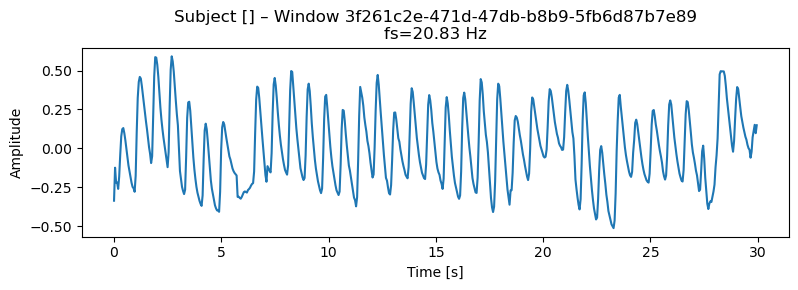

,subject,window_id,rec_id,label,fs_out,raw_len,proc_len,duration_raw_s,duration_proc_s
0,[],00a7334f-1a23-4ca5-9bd5-a4f19cc172c5,p000107,-1,20.83,3750,625,180.028805,30.004801
1,[],0178aa83-ae95-4026-8be1-806083f69615,p000773,-1,20.83,3750,625,180.028805,30.004801
2,[],0216de69-d40d-4788-a391-ab133fdf7717,p000188,-1,20.83,3750,625,180.028805,30.004801
3,[],0348668f-325b-4807-9727-15bf212b20e4,p000773,-1,20.83,3750,625,180.028805,30.004801
4,[],0434df69-f49f-403f-80ef-766e12460b7f,p000333,-1,20.83,3750,625,180.028805,30.004801
5,[],057c688a-f6fa-4fa7-bdab-98c9aa89192a,p000107,-1,20.83,3750,625,180.028805,30.004801
6,[],061d4ae0-992c-4e4a-b9c9-f00f39c555ac,p000107,-1,20.83,3750,625,180.028805,30.004801
7,[],072d815a-20fe-4e4d-844c-22b9a8160fda,p000631,-1,20.83,3750,625,180.028805,30.004801
8,[],08159319-96f6-4df6-b128-24b586958eb7,p000107,-1,20.83,3750,625,180.028805,30.004801
9,[],08167f26-b434-4c2a-8851-373e77093e0f,p000107,-1,20.83,3750,625,180.028805,30.004801


In [30]:
def main():
    root_path = os.path.join('../data/raw/mimic_ethnicity_data/mimic_ethnicity_struct_output.mat')
    out_filename = 'mimic_ethnicity_db'
    out_path = os.path.join('../data/processed/length_full/mimic_ethnicity_db')
    
    if not os.path.exists(out_path):
        os.mkdir(out_path)
    config = {
        "input_dir": root_path,
        "output_dir":  out_path,
        "fs_in": 125.00,
        "fs_out": 20.83,
        "window_size_sec": 30,
        "scale_type": "norm",
        "zero_phase": True,
        "out_filename": out_filename 
    }
    
    etl = MimicAFETL(config)
    out_file = etl.process()
    print("Saved General MIMIC III - Ethnicity windows to", out_file)
    df = load_as_df(out_path,out_filename)
    display(df.head(10))
    return df
if __name__ == "__main__":
    df_mimic_gen = main()

In [ ]:
all_subjects = df_mimic_gen['subject'].unique()

array(['p000052', 'p000107', 'p000109'], dtype=object)